In [1]:
# isim : Süleyman Arif Ersoy
# NO : 200205050
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [12]:
# 3. dereceden bir egriyi temsil edeceği veri seti yalın olarak cizdirilip ögrenilmiştir .
# Bundan dolayı ilk for suru sayısısı kadar diger for ise ax^3 + bx^2 + cx + d 'yi ifade eden (a,b,c,d) katsayı değerlerini random olarak oluşturuyor
def parcacik_olustur():
    return np.array([[random.uniform(-4,5) for _ in range(4)] for _ in range(pop_size)])

In [20]:
def fitness(katsayilar,x,y):
        sonuc = ortalama_kare_hatasi(katsayilar=katsayilar,y=y,x=x)
        return 1/(1+sonuc)

In [21]:
def ortalama_kare_hatasi(katsayilar,y,x):
        orneklem_sayisi=len(x)
        sonuc = []
        k = 1/2*orneklem_sayisi
        sonuc =[np.power(y[i][0] - PSO_fonksiyonu(katsayilar,x[i]),2) for i in range(0,orneklem_sayisi)]
        sonuc = np.sum(sonuc)
        return k*sonuc

In [30]:
def fonksiyon(katsayilar):
        return f"{katsayilar[0]}*x^3 + ({katsayilar[1]})*x^2 + ({katsayilar[2]})*x + ({katsayilar[3]})"

In [22]:
def PSO_fonksiyonu(katsayilar,x):
        return np.power(x, 3) * katsayilar[0] + np.power(x, 2) * katsayilar[1] + x * katsayilar[2] + katsayilar[3]

In [26]:
def PSO_algotitmasi():

    parcaciklar = parcacik_olustur()
    parcacık_hizlari = np.zeros_like(parcaciklar)
    pBest = parcaciklar.copy()
    gBest_index = np.argmax([fitness(katsayilar=p,x=X,y=Y) for p in parcaciklar])
    gBest = parcaciklar[gBest_index]


    for epoch in range(iterasyon):
        for i in range(pop_size):
            w = 0.5
            r1 = random.uniform(0, 1)
            r2 = random.uniform(0, 1)
            c1 = 1.5
            c2 = 1.5
            # Hızların zamana göre güncellemesi
            parcacık_hizlari[i] = (w * parcacık_hizlari[i] + c1 * r1 * (pBest[i] - parcaciklar[i]) + c2 * r2 * (gBest - parcaciklar[i]))

            # Pozisyonunun zamana göre güncellemesi
            parcaciklar[i] += parcacık_hizlari[i]

            # parcacıgın konumu degistikten sonra fitness degerleri eski ve mevcut fitness degeleri olarak bir değişkene attık
            mevcut_fitness = fitness(katsayilar=parcaciklar[i],x=X,y=Y)

            # eğer mevcut fitness değeri eski fitness değerinden buyukse pBest'i günceledik aynı şekilde gBest'ten de buyukse onu da guncelledik
            if mevcut_fitness > fitness(katsayilar=pBest[i],x=X,y=Y):
                pBest[i] = parcaciklar[i]
                if mevcut_fitness > fitness(katsayilar=gBest,x=X,y=Y):
                    gBest = parcaciklar[i]
    return gBest

Fonksiyon : 0.9389750652681461*x^3 + (1.5547960335121453)*x^2 + (1.5312361297505015)*x + (-0.5526001007153597)


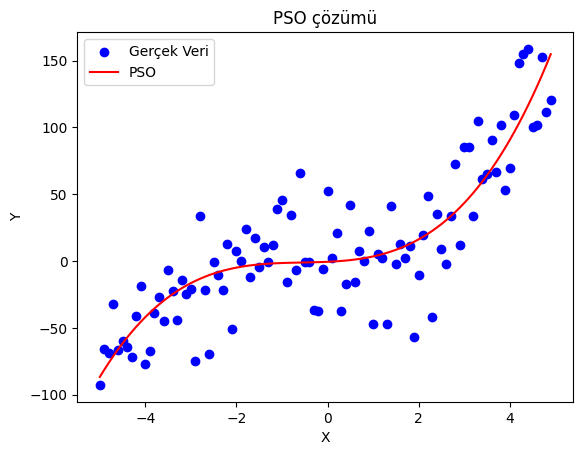

In [31]:
pop_size = 15 # suru sayısı
iterasyon = 100

random.seed(61)
# veri setindeki x ve y değerlerini alalım
df = pd.read_csv("data_file.csv")
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values

en_iyi_katsayilar = PSO_algotitmasi()

# En iyi katsayıları kullanarak polinomun tahmin edilen değerlerini hesapla
Y_en_iyi_pso = np.polyval(en_iyi_katsayilar, X)
print(f"Fonksiyon : {fonksiyon(en_iyi_katsayilar)}")
# Veri seti ve PSO ile oluşturulmuş polinomu çiz
plt.scatter(X, Y, label='Gerçek Veri',color="blue")
plt.plot(X, Y_en_iyi_pso, label='PSO', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('PSO çözümü')
plt.show()